In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [2]:
diabetes_dataset=pd.read_csv("./diabetes.csv")

In [3]:
#Dataset Values
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Dataset information
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#number and columns of dataset
diabetes_dataset.shape

(768, 9)

In [7]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0->Non-Diabetic
1->Diabetic

In [8]:
diabetes_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


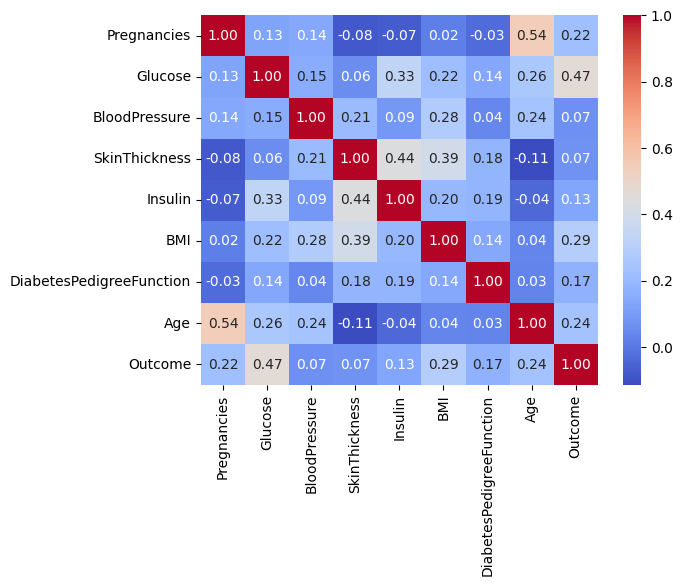

In [10]:
correlation_matrix=diabetes_dataset.corr()
Correlation_matrix=sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap='coolwarm')

   Age  Outcome
0   21        5
1   22       11
2   23        7
3   24        8
4   25       14


C:\Users\TUSHAR SAIN\AppData\Local\Temp\ipykernel_11500\1361176161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Outcome', data=outcomes_by_age, palette='viridis')


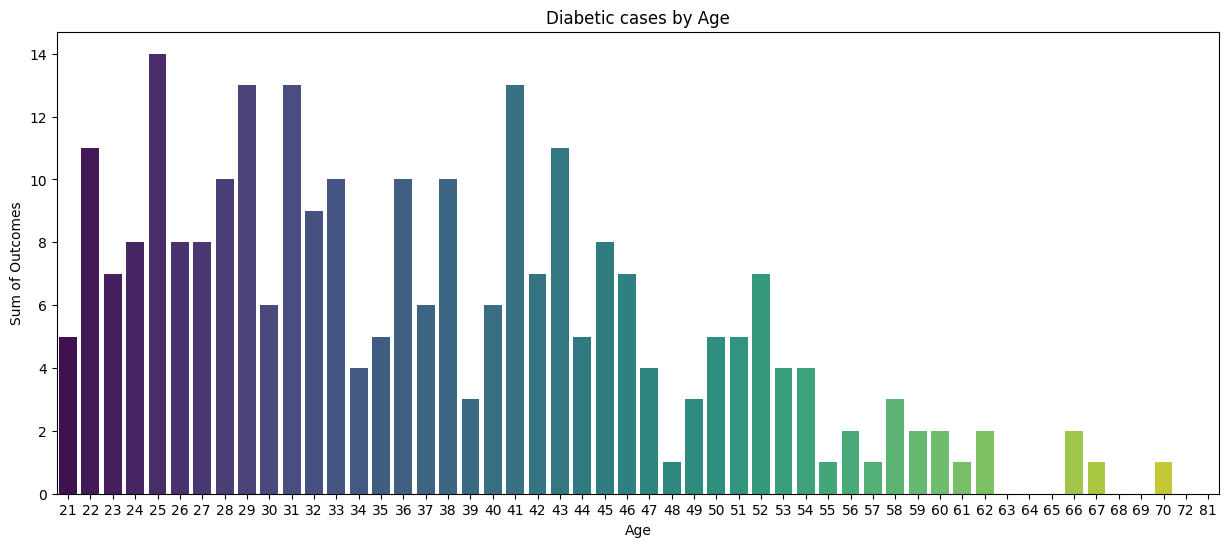

In [11]:
outcomes_by_age=diabetes_dataset.groupby("Age")["Outcome"].sum().reset_index()
print(outcomes_by_age.head())
plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Outcome', data=outcomes_by_age, palette='viridis')

# Customize the plot
plt.title('Diabetic cases by Age')
plt.xlabel('Age')
plt.ylabel('Sum of Outcomes')
plt.show()

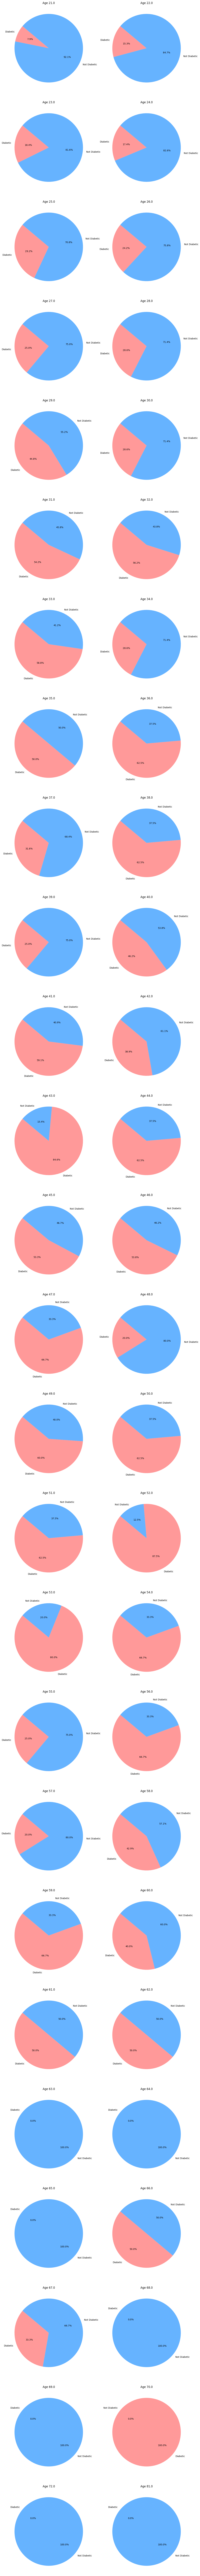

In [12]:
# Function to calculate the proportion of outcomes for each age group
def calculate_proportions_age(df):
    proportion_df = df.groupby('Age')['Outcome'].mean().reset_index()
    proportion_df['Not_Outcome'] = 1 - proportion_df['Outcome']
    return proportion_df

# Calculate proportions for each age group
proportions_age = calculate_proportions_age(diabetes_dataset)

# Determine the number of age groups
num_age_groups = len(proportions_age)

# Calculate number of rows needed
num_rows = (num_age_groups // 2) + (1 if num_age_groups % 2 != 0 else 0)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# Flatten axes if there is only one row
if num_rows == 1:
    axes = [axes]

# Plot pie charts for each age group
for index, row in proportions_age.iterrows():
    row_index = index // 2
    col_index = index % 2
    
    sizes = [row['Outcome'], row['Not_Outcome']]
    labels = ['Diabetic', 'Not Diabetic']
    colors = ['#ff9999', '#66b3ff']
    
    ax = axes[row_index][col_index]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Age {row["Age"]}')

# Hide any unused subplots if odd number of age groups
if num_age_groups % 2 != 0:
    axes[-1][-1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
#separating the data and labels
X=diabetes_dataset.drop("Outcome",axis=1)
Y=diabetes_dataset["Outcome"]

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Data Standardization

Train Test Split

In [16]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [18]:

Classifier=svm.SVC(kernel="linear")

In [19]:
#training and testing data
Classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
y_pred=Classifier.predict(X_test)

In [21]:
Accuracy_score=accuracy_score(y_pred,y_test)

In [22]:
print(f"Accuracy Score: {Accuracy_score}")

Accuracy Score: 0.8181818181818182


In [23]:
from sklearn import metrics
ClassificationReport=metrics.classification_report(y_pred,y_test)

In [24]:
print("Classification Report")
print(ClassificationReport)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       115
           1       0.62      0.74      0.67        39

    accuracy                           0.82       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.83      0.82      0.82       154



In [28]:
import pickle
filename="diabeticdisease_model.sav"
pickle.dump(Classifier,open(filename,"wb"))
loaded_model=pickle.load(open(filename,"rb"))

In [26]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [27]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)